### Sentiment analysis using scikit-learn and NLTK for Yelp review classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string
import os
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC # Support Vector Machines
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score

In [2]:
yelp = pd.read_csv(r'C:\Users\krish\Downloads\yelp.csv')

In [3]:
yelp.shape

(10000, 10)

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny
cool,1.000000,-0.743329,-0.944939
useful,-0.743329,1.000000,0.894506
funny,-0.944939,0.894506,1.000000


#### Visualising these correlations using Seaborn’s heatmap

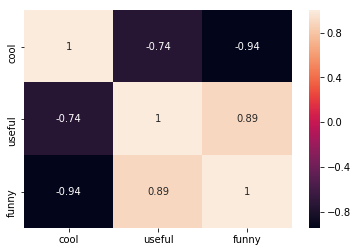

In [7]:
sns.heatmap(data=stars.corr(), annot=True)

Clearly, funny reviews are strongly correlated with useful reviews. 

In [8]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5) ]| (yelp['stars'] == 4) | (yelp['stars'] == 2)]
#Considering Reviews with stars 1,2,4,5 excluding reviews with 3 stars.

In [9]:
yelp_class.shape

(8539, 10)

In [10]:
X = yelp_class['text']
Y = yelp_class['stars']    # Creating x,y variables for classification

### Text pre-processing

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
stop = stopwords.words('english')

In [12]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def remove_digits(text):
    for digits in string.digits:
        text = text.replace(digits, '')
    return text

In [13]:
yelp['processedText'] = yelp_class['text'].apply(lambda x: x.lower())

In [14]:
yelp['processedText'] = yelp_class['text'].apply(remove_digits)

In [15]:
yelp['processedText'] = yelp_class['text'].apply(remove_punctuations)

In [16]:
yelp['processedText'] = yelp_class['text'].apply(nltk.word_tokenize)

In [19]:
yelp['processedText'].head()

0    [My, wife, took, me, here, on, my, birthday, f...
1    [I, have, no, idea, why, some, people, give, b...
2    [love, the, gyro, plate, ., Rice, is, so, good...
3    [Rosie, ,, Dakota, ,, and, I, LOVE, Chaparral,...
4    [General, Manager, Scott, Petello, is, a, good...
Name: processedText, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
import string
def text_process(text):
    
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [28]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
preds = nb.predict(X_test)

In [38]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 49  25  94  41]
 [ 10  19 206  40]
 [  8   4 770 277]
 [  5   3 474 537]]


             precision    recall  f1-score   support

          1       0.68      0.23      0.35       209
          2       0.37      0.07      0.12       275
          4       0.50      0.73      0.59      1059
          5       0.60      0.53      0.56      1019

avg / total       0.54      0.54      0.51      2562



In [39]:
final_accuracy = round(accuracy_score(preds,y_test)*100,2)
print('The model achieved an accuracy of', final_accuracy, '%')

The model achieved an accuracy of 53.67 %


In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The model achieved an accuracy of',acc_logreg)

The model achieved an accuracy of 57.22
